In [1]:
# imports:
import torch
import numpy as np
from torchvision.utils import save_image
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F



In [2]:
# Creating a noisy random tensor:
def create_image():
    input = torch.rand(3,224,224).requires_grad_(True)
    
    return input

In [3]:
# Importing the WideResNet-50 robust ImageNet model:             
from robustbench.utils import load_model
model = load_model(model_name='Salman2020Do_R18', dataset='imagenet', threat_model='Linf')
#print(model.fc[1])

In [4]:
# Defining an Optimizer:
def define_optimizer(input):
    optimizer = optim.Adam([input], lr = 0.08) 
    return optimizer                                                             # Read about Adam/SGD optimizers

In [5]:
# Plot the input image:
def visualize(input):  
    npimg = input.detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [6]:
# "Training": (Not really. We optimize the input image, not the model)
def training(input, optimizer, class_number):
    
    for epoch in range(1001): 
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = F.softmax(model(input.unsqueeze(0)),dim = 1)
        loss = 1 - output[0][class_number]     # output[0][1] = The probability that the input is an image of a goldfish. 
        loss.backward()
        optimizer.step()

        #print(loss.item())
        #print(output)
        
        if (epoch%100 == 0):
            # Show the tensor as an image and see the progress:
            print("\nEpoch #", epoch,":\n")
            visualize(input)
            print("Loss: ",loss.item())

    print('Finished Training\n\n\n')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Epoch # 0 :



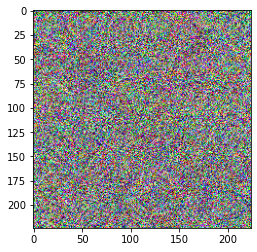

Loss:  0.9996297359466553


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Epoch # 100 :



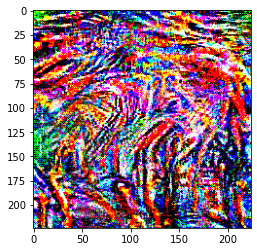

Loss:  0.00040096044540405273


In [ ]:
# We want an image of a goldfish:
input = create_image()
training(input, define_optimizer(input), 1)
save_image(input, "goldfish.png")

In [ ]:
# We want an image of a banana :
input = create_image()
training(input, define_optimizer(input), 954)
save_image(input, "banana.png")

In [ ]:
# We want an image of a golden retriever :
input = create_image()
training(input, define_optimizer(input), 207)
save_image(input, "golden_retriever.png")


In [ ]:
# We want an image of a tabby cat :
input = create_image()
training(input, define_optimizer(input), 281)
save_image(input, "tabby_cat.png")
